In [108]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report
import matplotlib.pyplot as plt
from preprocessing import load_and_split
from sklearn.pipeline import Pipeline

In [61]:
#Preprocessing function for all methods
X_train, X_test,y_train, y_test = load_and_split('data/training_data_ht2025.csv')

In [99]:
param_grid = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'clf__solver': ['lbfgs'],
        'clf__penalty': ['l2'],
        'clf__C': np.arange(0.0001,10,10),
        'clf__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]

    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'clf__solver': ['liblinear'],
        'clf__penalty': ['l2'],  
        'clf__C': np.arange(0.0001,10,10),
        'clf__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]

    }
]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=2137, max_iter=2000))
])

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=23) 

In [100]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv_strategy, 
    scoring='matthews_corrcoef',
    verbose=2,
    n_jobs=-1 
)
grid_search.fit(X_train, y_train)

# --- 5. Retrieve the Best Results ---
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best CV Score (Accuracy): {grid_search.best_score_:.4f}")

# --- 6. Final Model Evaluation ---
# The best estimator is the model trained with the best parameters on all of X_train.
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=MinMaxScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs, scaler=MinMaxScaler(); total time=   0.0s
[CV] END clf__C=0.0001, clf__class_weight=None

In [101]:
y_pred_test = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_test)
final_accuracy

0.734375

In [102]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay,confusion_matrix,ConfusionMatrixDisplay

In [103]:
y_proba = best_model.predict_proba(X_test)[:,1]
y_pred = best_model.predict(X_test)
auc_score = roc_auc_score(y_test, y_proba)

cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

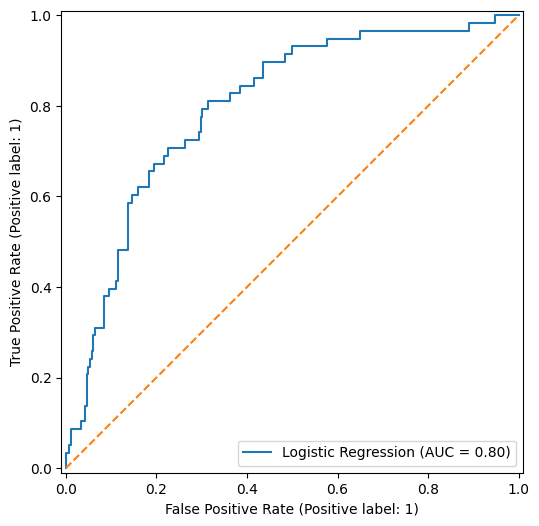

In [104]:
fig, ax = plt.subplots(figsize=(8, 6))
roc_display = RocCurveDisplay.from_estimator(
    best_model,         # Your final fitted model
    X_test,             # Test features
    y_test,             # True test labels
    name='Logistic Regression',
    ax=ax,              # Pass the axes object
)
ax.plot([0,1],[0,1], '--')

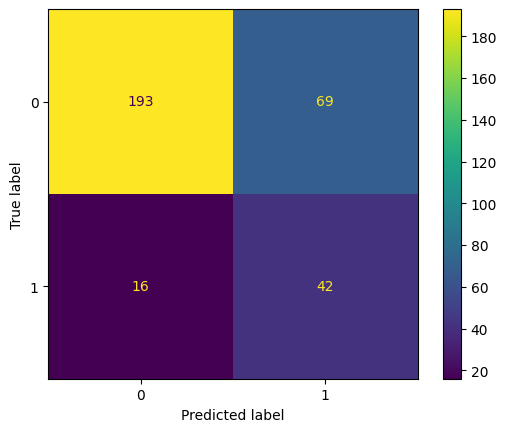

In [105]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()

In [109]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred, target_names=['low_bike_demand', 'high_bike_demand']))

                  precision    recall  f1-score   support

 low_bike_demand       0.92      0.74      0.82       262
high_bike_demand       0.38      0.72      0.50        58

        accuracy                           0.73       320
       macro avg       0.65      0.73      0.66       320
    weighted avg       0.82      0.73      0.76       320

